In [17]:
from data_utils import read_all_candles, read_all_scores, _cut_special
import numpy as np
from submission_utils import get_submission_markowitz, test_submission
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
candles = read_all_candles()

Getting candles data for Darwins...: 100%|██████████| 96/96 [00:01<00:00, 53.53it/s]


In [3]:
scores = read_all_scores()

100%|██████████| 94/94 [00:01<00:00, 92.10it/s]


In [4]:
scores["ZUJ"].head()

,Dp,Ex,Mc,Rs,Ra,Os,Cs,Rp,Rm,Dc,La,Pf,Cp,Ds,fcal_ts,lcal_ts
eod_ts,,,,,,,,,,,,,,,,
2019-06-24 21:00:00,0.000000,0.000000,0.0,10.0,0.000000,10.000000,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.297619,2019-06-24 23:00:00.000,2020-08-24 17:40:14.464
2019-06-25 21:00:00,0.000000,0.000000,0.0,10.0,10.000000,1.467391,6.975000,0.0,0.0,0.0,0.0,8.631168,0.000000,0.595311,2019-06-25 23:00:00.000,2020-08-24 17:40:14.464
2019-06-26 21:00:00,0.055556,0.046296,0.0,10.0,0.207532,2.995192,9.471649,0.0,0.0,0.0,0.0,8.195091,0.546517,0.893102,2019-06-26 23:00:00.000,2020-08-24 17:40:14.464
2019-06-27 21:00:00,0.102405,0.085338,0.0,10.0,0.207532,2.995192,9.471649,0.0,0.0,0.0,0.0,7.974192,1.162631,1.190982,2019-06-27 23:00:00.000,2020-08-24 17:40:14.464
2019-06-28 21:00:00,0.102405,0.085338,0.0,10.0,2.008004,6.541667,9.514286,0.0,0.0,0.0,0.0,9.473223,1.677234,1.489235,2019-06-28 23:00:00.000,2020-08-24 17:40:14.464


In [5]:
def _compute_weighted_mean(df):
    means = df["Pf"].values  # mean_score
    weights = np.linspace(0.0, 1.0, len(means))
    mean = sum([mu * w / sum(weights) for mu, w in zip(means, weights)]) / len(means)
    return mean

In [11]:
def _compute_mean_perf(df):
    # df = _cut_special(df, first="2020-05-01")
    return df["Pf"].mean()

In [12]:
candles = {k: v for k, v in candles.items() if k in scores}

In [13]:
"UYZ" in candles

True

In [14]:
"ERQ" in candles

True

In [15]:
len(candles)

94

In [16]:
scores_mean_perf = {k: _compute_mean_perf(v) for k, v in scores.items()}

In [20]:
good_scores_assets = [
    asset for asset, val in scores_mean_perf.items()
    if val >= 7.0
]

In [23]:
bad_scores_assets = [
    asset for asset, val in scores_mean_perf.items()
    if val < 7.0
]

In [18]:
mean_scores_list = [score for score in scores_mean_perf.values()]

(array([ 3.,  4.,  4.,  2.,  9., 13., 12., 21., 12., 14.]),
 array([5.22148546, 5.67843445, 6.13538345, 6.59233244, 7.04928144,
        7.50623043, 7.96317943, 8.42012842, 8.87707742, 9.33402641,
        9.79097541]),
 <a list of 10 Patch objects>)

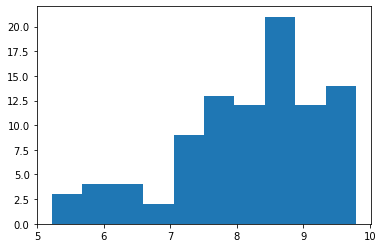

In [19]:
plt.hist(mean_scores_list)

In [21]:
len(good_scores_assets)

82

In [26]:
bad_scores_assets

['JTL',
 'LWK',
 'SHC',
 'PHI',
 'PEW',
 'LHB',
 'UEI',
 'MET',
 'YFC',
 'SRI',
 'ULI',
 'MCA']

In [46]:
scores_mean_perf

{'GRU': 9.089586291753788,
 'TMF': 9.999803393396537,
 'THA': 9.398361855656393,
 'JTL': 9.757699192715096,
 'LWK': 9.276184129798246,
 'CIS': 9.878183496947258,
 'GGR': 7.92602236992265,
 'VRT': 9.409154717153518,
 'VVC': 4.81332840862079,
 'GRI': 8.324837722997177,
 'CBY': 6.405379030828284,
 'BAX': 9.236508699479117,
 'DIG': 9.919114648097905,
 'SHC': 9.64095399247337,
 'LWE': 9.847382948493781,
 'HEO': 9.813764584221314,
 'RAT': 7.564274063111471,
 'AWW': 9.680052063309008,
 'NYD': 9.0013102668056,
 'ZUJ': 9.552253461972539,
 'AUX': 9.78760633836104,
 'FFV': 8.782046240269302,
 'PME': 9.89436608895998,
 'ULT': 9.93947434601841,
 'DZF': 9.827968543104904,
 'ZAB': 8.644851410249402,
 'ZCD': 9.827532193349441,
 'USX': 9.929181444644486,
 'SBY': 9.981088358759507,
 'BFS': 8.46145261896242,
 'CSB': 9.330948273943408,
 'PHI': 8.019456120839852,
 'ERO': 9.65264378478128,
 'PEW': 8.220868404612538,
 'YAX': 9.696726916155235,
 'PPT': 9.637066285137761,
 'WFJ': 8.764936979848123,
 'FIR': 9.8

In [15]:
scores_mean_perf["CIS"]

9.894573318451048

In [33]:
scores_wmean_perf = {k: _compute_weighted_mean(v) for k, v in scores.items()}

In [36]:
#list(sorted(scores_wmean_perf, key=scores_wmean_perf.get, reverse=True))

In [37]:
#list(sorted(scores_mean_perf, key=scores_mean_perf.get, reverse=True))

In [124]:
asset_names = [k for k in scores_mean_perf.keys()]

In [125]:
weights = np.array([v for v in scores_mean_perf.values()], dtype=np.float32)

In [126]:
#weights = [w / sum(weights) for w in weights]

In [143]:
weights = weights / weights.sum()

In [144]:
weights.sum()

1.0

In [145]:
weights

array([0.01138288, 0.01235004, 0.01193356, 0.01205713, 0.01199868,
       0.01218286, 0.01040663, 0.01146562, 0.00626043, 0.00999471,
       0.00709939, 0.01170953, 0.0123144 , 0.01207961, 0.01205506,
       0.01208098, 0.00936924, 0.01153721, 0.01105944, 0.01185821,
       0.01200494, 0.01101085, 0.01217083, 0.01227473, 0.0121077 ,
       0.01018308, 0.01213062, 0.01228555, 0.01231641, 0.01070157,
       0.01159721, 0.01061911, 0.01211298, 0.01067431, 0.01204059,
       0.01205295, 0.0107945 , 0.01221972, 0.00955811, 0.00796757,
       0.00681086, 0.01218091, 0.01220957, 0.01014434, 0.00922975,
       0.01043202, 0.01173947, 0.01222256, 0.01095631, 0.01084916,
       0.01165668, 0.00998614, 0.00140508, 0.00598241, 0.01194209,
       0.01045221, 0.00661459, 0.01003044, 0.01207072, 0.00819545,
       0.01099179, 0.01109758, 0.00857459, 0.00688019, 0.0122836 ,
       0.01136428, 0.01174374, 0.01148848, 0.01041626, 0.01126819,
       0.01079169, 0.01114263, 0.01060964, 0.00965546, 0.01140

In [146]:
subm_plantilla = pd.read_csv("./submission/submission.csv")

In [147]:
dates = subm_plantilla["eod_ts"]

In [153]:
np.repeat(np.array([weights]), subm_plantilla.shape[0], axis=0).shape

(2229, 94)

In [154]:
df = pd.DataFrame(data=np.repeat(np.array([weights]), subm_plantilla.shape[0], axis=0), columns=[f"allo_{col}" for col in asset_names], dtype=np.float32)

In [156]:
df.set_index(dates, inplace=True)

In [161]:
test_submission(df.div(df.sum(axis=1), axis=0))

In [162]:
df = df.div(df.sum(axis=1), axis=0)

In [163]:
test_submission(df)

In [160]:
#df.div(df.sum(axis=1), axis=0).dtypes

In [96]:
w_dict = {asset: w for asset, w in zip(asset_names, weights)}

In [97]:
sum(w_dict.values())

1.000000043772161

In [41]:
submission = get_submission_markowitz(w_dict, asset_names)

In [43]:
test_submission(submission)

In [44]:
submission.head()

,allo_GRU,allo_TMF,allo_THA,allo_JTL,allo_LWK,allo_CIS,allo_GGR,allo_VRT,allo_VVC,allo_GRI,...,allo_SYO,allo_JNE,allo_OJG,allo_EOP,allo_NVL,allo_ZVQ,allo_FNM,allo_MCA,allo_OOS,allo_XRX
eod_ts,,,,,,,,,,,,,,,,,,,,,
2020-08-18 00:00:00,0.011222,0.012345,0.011603,0.012047,0.011452,0.012195,0.009785,0.011616,0.005942,0.010278,...,0.011105,0.009957,0.01195,0.008108,0.009721,0.007561,0.01045,0.010045,0.012228,0.009515
2020-08-18 01:00:00,0.011222,0.012345,0.011603,0.012047,0.011452,0.012195,0.009785,0.011616,0.005942,0.010278,...,0.011105,0.009957,0.01195,0.008108,0.009721,0.007561,0.01045,0.010045,0.012228,0.009515
2020-08-18 02:00:00,0.011222,0.012345,0.011603,0.012047,0.011452,0.012195,0.009785,0.011616,0.005942,0.010278,...,0.011105,0.009957,0.01195,0.008108,0.009721,0.007561,0.01045,0.010045,0.012228,0.009515
2020-08-18 03:00:00,0.011222,0.012345,0.011603,0.012047,0.011452,0.012195,0.009785,0.011616,0.005942,0.010278,...,0.011105,0.009957,0.01195,0.008108,0.009721,0.007561,0.01045,0.010045,0.012228,0.009515
2020-08-18 04:00:00,0.011222,0.012345,0.011603,0.012047,0.011452,0.012195,0.009785,0.011616,0.005942,0.010278,...,0.011105,0.009957,0.01195,0.008108,0.009721,0.007561,0.01045,0.010045,0.012228,0.009515


In [67]:
submission.astype(np.float16)

,allo_GRU,allo_TMF,allo_THA,allo_JTL,allo_LWK,allo_CIS,allo_GGR,allo_VRT,allo_VVC,allo_GRI,...,allo_SYO,allo_JNE,allo_OJG,allo_EOP,allo_NVL,allo_ZVQ,allo_FNM,allo_MCA,allo_OOS,allo_XRX
eod_ts,,,,,,,,,,,,,,,,,,,,,
2020-08-18 00:00:00,0.011223,0.012344,0.011604,0.012047,0.011452,0.012192,0.009789,0.01162,0.005943,0.010277,...,0.011101,0.009956,0.011948,0.00811,0.00972,0.007561,0.010452,0.010048,0.01223,0.009514
2020-08-18 01:00:00,0.011223,0.012344,0.011604,0.012047,0.011452,0.012192,0.009789,0.01162,0.005943,0.010277,...,0.011101,0.009956,0.011948,0.00811,0.00972,0.007561,0.010452,0.010048,0.01223,0.009514
2020-08-18 02:00:00,0.011223,0.012344,0.011604,0.012047,0.011452,0.012192,0.009789,0.01162,0.005943,0.010277,...,0.011101,0.009956,0.011948,0.00811,0.00972,0.007561,0.010452,0.010048,0.01223,0.009514
2020-08-18 03:00:00,0.011223,0.012344,0.011604,0.012047,0.011452,0.012192,0.009789,0.01162,0.005943,0.010277,...,0.011101,0.009956,0.011948,0.00811,0.00972,0.007561,0.010452,0.010048,0.01223,0.009514
2020-08-18 04:00:00,0.011223,0.012344,0.011604,0.012047,0.011452,0.012192,0.009789,0.01162,0.005943,0.010277,...,0.011101,0.009956,0.011948,0.00811,0.00972,0.007561,0.010452,0.010048,0.01223,0.009514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 17:00:00,0.011223,0.012344,0.011604,0.012047,0.011452,0.012192,0.009789,0.01162,0.005943,0.010277,...,0.011101,0.009956,0.011948,0.00811,0.00972,0.007561,0.010452,0.010048,0.01223,0.009514
2020-12-24 18:00:00,0.011223,0.012344,0.011604,0.012047,0.011452,0.012192,0.009789,0.01162,0.005943,0.010277,...,0.011101,0.009956,0.011948,0.00811,0.00972,0.007561,0.010452,0.010048,0.01223,0.009514
2020-12-24 19:00:00,0.011223,0.012344,0.011604,0.012047,0.011452,0.012192,0.009789,0.01162,0.005943,0.010277,...,0.011101,0.009956,0.011948,0.00811,0.00972,0.007561,0.010452,0.010048,0.01223,0.009514


In [81]:
submission = submission.div(submission.sum(axis=1), axis=0)

In [82]:
submission.iloc[0,:].values.sum()

0.9999999999999997

In [164]:
submission.to_csv("submission_2203_5.csv", header=True, index=True)

In [70]:
test_submission(submission)

In [57]:
all(submission.div(submission.sum(axis=1), axis=0).sum(axis=1) == 1)

True

In [65]:
submission.head()

,allo_GRU,allo_TMF,allo_THA,allo_JTL,allo_LWK,allo_CIS,allo_GGR,allo_VRT,allo_VVC,allo_GRI,...,allo_SYO,allo_JNE,allo_OJG,allo_EOP,allo_NVL,allo_ZVQ,allo_FNM,allo_MCA,allo_OOS,allo_XRX
eod_ts,,,,,,,,,,,,,,,,,,,,,
2020-08-18 00:00:00,0.011222,0.012345,0.011603,0.012047,0.011452,0.012195,0.009785,0.011616,0.005942,0.010278,...,0.011105,0.009957,0.01195,0.008108,0.009721,0.007561,0.01045,0.010045,0.012228,0.009515
2020-08-18 01:00:00,0.011222,0.012345,0.011603,0.012047,0.011452,0.012195,0.009785,0.011616,0.005942,0.010278,...,0.011105,0.009957,0.01195,0.008108,0.009721,0.007561,0.01045,0.010045,0.012228,0.009515
2020-08-18 02:00:00,0.011222,0.012345,0.011603,0.012047,0.011452,0.012195,0.009785,0.011616,0.005942,0.010278,...,0.011105,0.009957,0.01195,0.008108,0.009721,0.007561,0.01045,0.010045,0.012228,0.009515
2020-08-18 03:00:00,0.011222,0.012345,0.011603,0.012047,0.011452,0.012195,0.009785,0.011616,0.005942,0.010278,...,0.011105,0.009957,0.01195,0.008108,0.009721,0.007561,0.01045,0.010045,0.012228,0.009515
2020-08-18 04:00:00,0.011222,0.012345,0.011603,0.012047,0.011452,0.012195,0.009785,0.011616,0.005942,0.010278,...,0.011105,0.009957,0.01195,0.008108,0.009721,0.007561,0.01045,0.010045,0.012228,0.009515
